In [ ]:
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
import numpy as np
import glob
import scipy.ndimage as nd
from scipy.ndimage import grey_opening, binary_dilation, median_filter
from skimage.util import img_as_uint
from astropy.modeling import models, fitting

def fill(data, invalid=None):
    """
    Replace the value of invalid 'data' cells (indicated by 'invalid') 
    by the value of the nearest valid data cell

    Input:
        data:    numpy array of any dimension
        invalid: a binary array of same shape as 'data'. True cells set where data
                 value should be replaced.
                 If None (default), use: invalid  = np.isnan(data)

    Output: 
        Return a filled array. 
    """
    #import numpy as np
    #import scipy.ndimage as nd

    if invalid is None: invalid = np.isnan(data)

    ind = nd.distance_transform_edt(invalid, return_distances=False, return_indices=True)
    return data[tuple(ind)]


In [29]:
images = glob.glob('/scratch/bern/elferich/deco_lace_manuscript_processing/refined_assembly_it2/fff_lamella1_montage_t2.tif')
for image_fn in images[:]:
    print(image_fn)
    image = np.int32(imread(image_fn))
    image_filter = median_filter(image,10)
    bright_mask = image_filter > 15000
    bright_mask = binary_dilation(bright_mask, iterations=50)
    dark_mask = image_filter < 1900 
    dark_mask = binary_dilation(dark_mask, iterations=50)


    mask = np.invert(bright_mask | dark_mask)
    plt.imshow(image,cmap="gray")
    plt.show()
    plt.imshow(mask,cmap="gray")
    plt.show()

    y, x = np.mgrid[:image.shape[0], :image.shape[1]]
    p_init = models.Polynomial2D(degree=3)
    fit_p = fitting.LevMarLSQFitter()
    xn = x.flatten()[mask.flatten()]
    yn = y.flatten()[mask.flatten()]
    imn = image.flatten()[mask.flatten()]
    p = fit_p(p_init, xn, yn, imn)
    plt.imshow(p(x, y), interpolation='nearest')


/scratch/bern/elferich/deco_lace_manuscript_processing/refined_assembly_it2/fff_lamella1_montage_t2.tif


In [12]:
q = p.copy()

In [13]:
q

<Polynomial2D(2, c0_0=2811.74617045, c1_0=3.5154149, c2_0=-0.00059462, c0_1=0.03079618, c0_2=-0.00007415, c1_1=-0.00014512)>

In [14]:
  p = fit_p(p_init, x.flatten(), y.flatten(), image.flatten())

In [20]:
xn = x.flatten()[mask.flatten()]
yn = y.flatten()[mask.flatten()]
imn = image.flatten()[mask.flatten()] 

In [21]:
p = fit_p(p_init, xn, yn, imn)

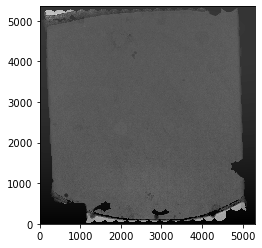

In [24]:
 plt.imshow(image-p(x, y), origin='lower', interpolation='nearest',cmap="gray")



In [28]:
nn = image-p(x, y)+2.0
nn /= nn.max()
im = img_as_uint(nn)+10000
imsave("/scratch/bern/elferich/deco_lace_manuscript_processing/refined_assembly_it2/fff_lamella1test.tif",im)

In [ ]:
plt.imshow(image*mask,cmap='gray')

In [ ]:
plt.imshow(opened_image,cmap='gray')

In [ ]:
imsave('/scratch/bern/elferich/deco_lace_manuscript_processing/views/t_opened.tif',nd.gaussian_filter(opened_image,20))